In [1]:
import multi_experiment
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.io as scipyio
import numpy as np

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[1000/4000] Avg Total Reward 149.091878378, DQN Loss 14.1585749686, Epsilon 0.367870243994
[2000/4000] Avg Total Reward 766.577178325, DQN Loss 16.1436133087, Epsilon 0.135328516416
[3000/4000] Avg Total Reward 1102.822709, DQN Loss 32.0309422612, Epsilon 0.0497833343533
[4000/4000] Avg Total Reward 1269.29458865, DQN Loss 20.3683453202, Epsilon 0.0183138073554
Evaluation Result: 1368.36497112


/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


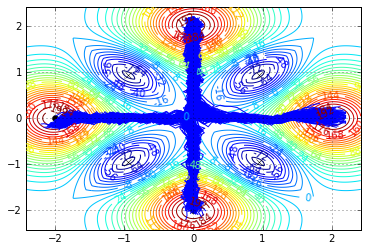

In [2]:
dqn_hidden_spec = [
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh}
            ]

exp = multi_experiment.Experiments(seed=0,action_res=[5,5],nr_goal=4,discount=0.7,dqn_hidden_spec=dqn_hidden_spec,
                     max_epi=4000,max_step=20,
                     batch_size=6000,learning_rate=1e-4,target_update_period=25,
                     replay_memory_size=50000,eps_decay_rate=0.99995, strategy="Softmax",scale=0.1)

return_list = exp.run(display_period=1000)
eval_list, info_list = exp.evaluation(max_eval_epi=1000)
exp.env.plot_paths(info_list)
plt.draw()
plt.pause(0.005)

Evaluation Result: 1356.96243486


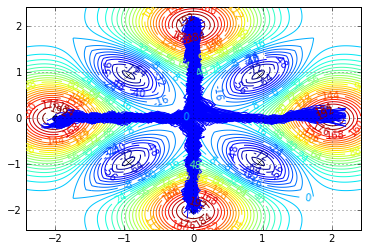

In [3]:
eval_list, info_list = exp.evaluation(max_eval_epi=1000)
exp.env.plot_paths(info_list)
plt.draw()
plt.pause(0.005)

In [4]:
import pickle
output = open('./multigoal_expert_demo.pkl', 'wb')
demonstrations = exp.demonstrations(max_demo=1000)
pickle.dump([demonstrations], output)
output.close()